In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv
/kaggle/input/uber-ride-analytics-dashboard/Dasboard.gif
/kaggle/input/uber-ride-analytics-dashboard/Uber.pbix
/kaggle/input/uber-bookings/ncr_ride_bookings.csv
/kaggle/input/airlines-flights-data/airlines_flights_data.csv


# **Import Data**

In [48]:
df = pd.read_csv('/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv')

In [49]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


# **Exploratory Data Analysis**

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [51]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [52]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [53]:
df.duplicated().sum()

0

In [54]:
df.dtypes

Date                                  object
Time                                  object
Booking ID                            object
Booking Status                        object
Customer ID                           object
Vehicle Type                          object
Pickup Location                       object
Drop Location                         object
Avg VTAT                             float64
Avg CTAT                             float64
Cancelled Rides by Customer          float64
Reason for cancelling by Customer     object
Cancelled Rides by Driver            float64
Driver Cancellation Reason            object
Incomplete Rides                     float64
Incomplete Rides Reason               object
Booking Value                        float64
Ride Distance                        float64
Driver Ratings                       float64
Customer Rating                      float64
Payment Method                        object
dtype: object

In [55]:
df.shape

(150000, 21)

# **Visualizations (EDA)**

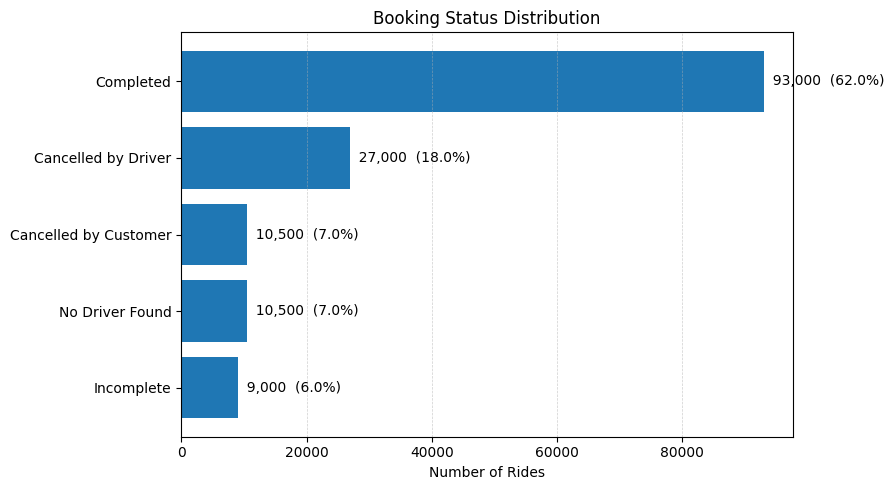

In [56]:
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv")
col = "Booking Status"
counts = df[col].fillna("Missing").value_counts()
total = counts.sum()
perc = counts / total

counts = counts.sort_values(ascending=True)
perc = perc[counts.index]

plt.figure(figsize=(9,5))
y = np.arange(len(counts))
plt.barh(y, counts.values)
plt.yticks(y, counts.index)
plt.xlabel("Number of Rides")
plt.title("Booking Status Distribution")
for i,(v,p) in enumerate(zip(counts.values, perc.values)):
    plt.text(v, i, f"  {int(v):,}  ({p*100:,.1f}%)", va="center")
plt.grid(axis="x", linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


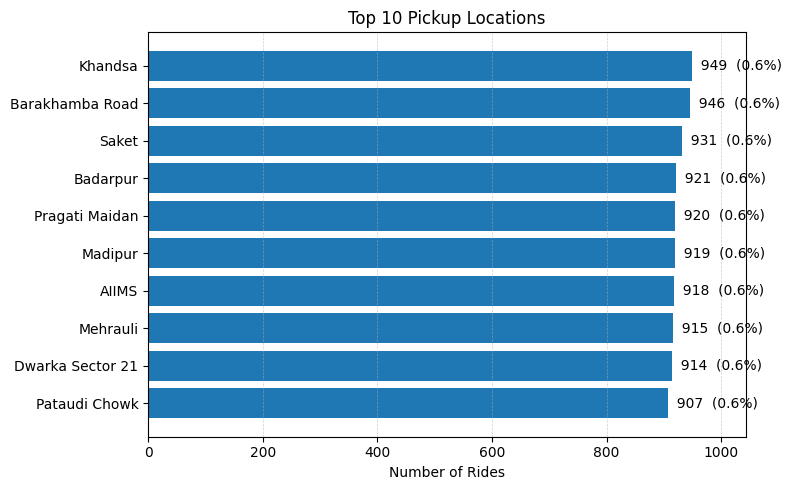

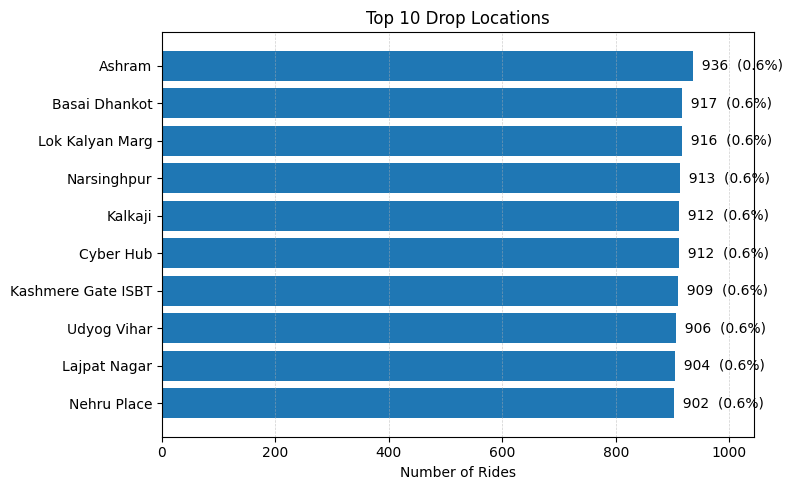

In [57]:

#  prep 
col_pu = "Pickup Location"
col_do = "Drop Location"

df[col_pu] = df[col_pu].astype(str).str.strip()
df[col_do] = df[col_do].astype(str).str.strip()

top = 10
pu = df[col_pu].dropna().value_counts().head(top).sort_values()      # ascending for barh
do = df[col_do].dropna().value_counts().head(top).sort_values()

pu_total = df[col_pu].notna().sum()
do_total = df[col_do].notna().sum()
pu_pct = (pu / pu_total).reindex(pu.index)
do_pct = (do / do_total).reindex(do.index)

# shared x-limit for apples-to-apples comparison
xmax = int(max(pu.max(), do.max()) * 1.10)

plt.figure(figsize=(8,5))
y = np.arange(len(pu))
plt.barh(y, pu.values)
plt.yticks(y, pu.index)
plt.xlim(0, xmax)
plt.xlabel("Number of Rides")
plt.title(f"Top {top} Pickup Locations")
for i,(v,p) in enumerate(zip(pu.values, pu_pct.values)):
    plt.text(v, i, f"  {int(v):,}  ({p*100:.1f}%)", va="center")
plt.grid(axis="x", linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,5))
y = np.arange(len(do))
plt.barh(y, do.values)
plt.yticks(y, do.index)
plt.xlim(0, xmax)
plt.xlabel("Number of Rides")
plt.title(f"Top {top} Drop Locations")
for i,(v,p) in enumerate(zip(do.values, do_pct.values)):
    plt.text(v, i, f"  {int(v):,}  ({p*100:.1f}%)", va="center")
plt.grid(axis="x", linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


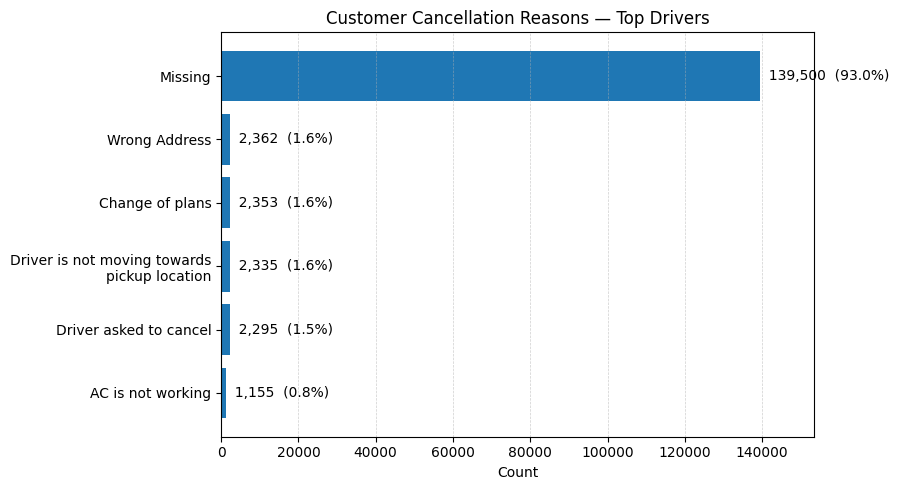

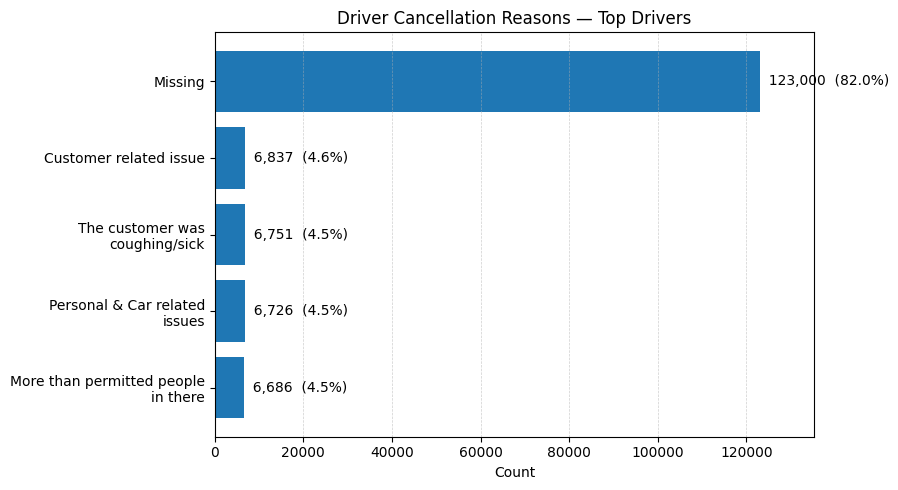

In [58]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, textwrap

col_customer = "Reason for cancelling by Customer"
col_driver   = "Driver Cancellation Reason"

def plot_top_reasons(series, title, top_n=8):
    s = (series.astype(str).str.strip().str.replace(r"\s+"," ", regex=True))
    s = s.replace({"nan":"Missing","": "Missing","None":"Missing","NaN":"Missing"})
    counts = s.value_counts(dropna=False)
    total = counts.sum()
    if total == 0: return

    top_counts = counts.head(top_n)
    other_ct = counts.iloc[top_n:].sum()
    if other_ct > 0:
        top_counts.loc["Other"] = other_ct

    top_counts = top_counts.sort_values(ascending=True)
    perc = (top_counts / total).reindex(top_counts.index)

    labels = [textwrap.fill(lbl, width=28) for lbl in top_counts.index]

    plt.figure(figsize=(9,5))
    y = np.arange(len(top_counts))
    plt.barh(y, top_counts.values)
    plt.yticks(y, labels)
    plt.xlabel("Count")
    plt.title(title)
    plt.xlim(0, int(top_counts.max()*1.10))
    for i,(v,p) in enumerate(zip(top_counts.values, perc.values)):
        plt.text(v, i, f"  {int(v):,}  ({p*100:.1f}%)", va="center")
    plt.grid(axis="x", linestyle="--", linewidth=0.5, alpha=0.6)
    plt.tight_layout()
    plt.show()

plot_top_reasons(df[col_customer], "Customer Cancellation Reasons — Top Drivers", top_n=8)
plot_top_reasons(df[col_driver],   "Driver Cancellation Reasons — Top Drivers",   top_n=8)


In [59]:
# Build event_time from Date + (Booking Time | Time)
time_col = "Booking Time" if "Booking Time" in df.columns else ("Time" if "Time" in df.columns else None)
if time_col:
    df["event_time"] = pd.to_datetime(df["Date"].astype(str) + " " + df[time_col].astype(str), errors="coerce")
else:
    df["event_time"] = pd.to_datetime(df["Date"], errors="coerce")

df["weekday"] = df["event_time"].dt.day_name()
df["hour"] = df["event_time"].dt.hour

# Helper for consistent finishing touches
def finalize(title=None, xlabel=None, ylabel=None, grid_axis=None):
    if title: plt.title(title)
    if xlabel: plt.xlabel(xlabel)
    if ylabel: plt.ylabel(ylabel)
    if grid_axis in ("x","y"):
        plt.grid(axis=grid_axis, linestyle="--", linewidth=0.5, alpha=0.6)
    plt.tight_layout()
    plt.show()



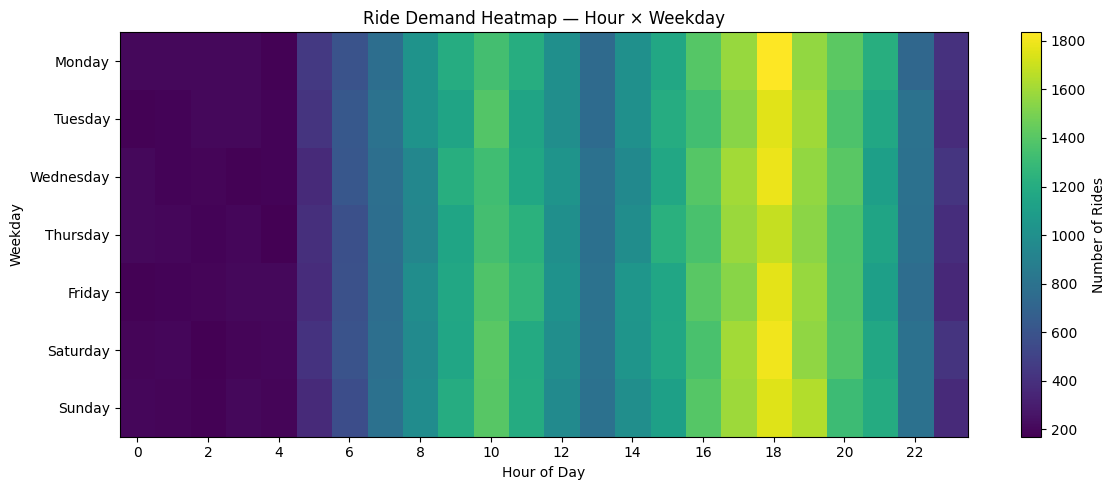

In [60]:
if df["event_time"].notna().any():
    wd_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    heat = (df.dropna(subset=["weekday","hour"])
              .groupby(["weekday","hour"]).size()
              .unstack(fill_value=0)
              .reindex(wd_order)
              .reindex(columns=range(24), fill_value=0))

    plt.figure(figsize=(12,5))
    plt.imshow(heat.values, aspect="auto")  # default colormap
    cbar = plt.colorbar(); cbar.set_label("Number of Rides")
    plt.xticks(ticks=np.arange(0,24,2), labels=[str(h) for h in range(0,24,2)])
    plt.yticks(ticks=np.arange(len(heat.index)), labels=heat.index)
    finalize("Ride Demand Heatmap — Hour × Weekday", "Hour of Day", "Weekday")


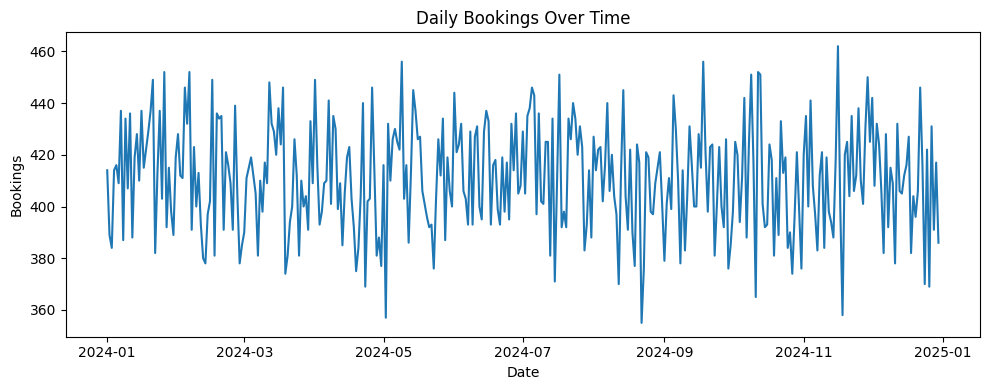

In [61]:
if df["event_time"].notna().any():
    daily = (df.dropna(subset=["event_time"])
               .groupby(df["event_time"].dt.date).size()
               .reset_index(name="bookings"))
    xdates = pd.to_datetime(daily.iloc[:,0], errors="coerce")
    plt.figure(figsize=(10,4))
    plt.plot(xdates, daily["bookings"])
    finalize("Daily Bookings Over Time", "Date", "Bookings")


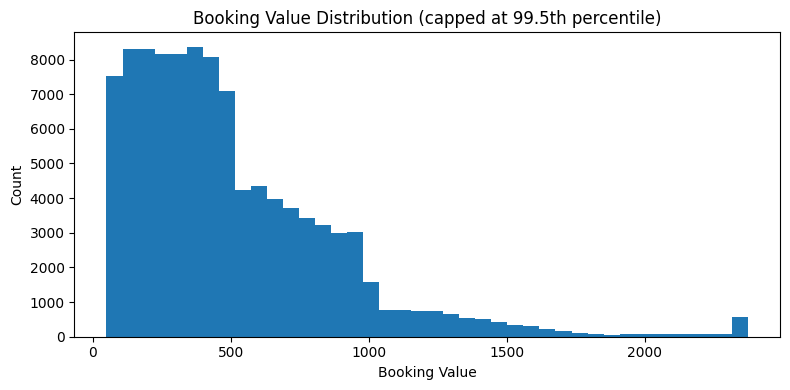

In [62]:
if "Booking Value" in df.columns:
    vals = pd.to_numeric(df["Booking Value"], errors="coerce").dropna()
    if len(vals) > 0:
        cap = np.nanpercentile(vals, 99.5)  # cap extreme tail for readability
        vals_cap = vals.clip(upper=cap)
        plt.figure(figsize=(8,4))
        plt.hist(vals_cap, bins=40)
        finalize("Booking Value Distribution (capped at 99.5th percentile)", "Booking Value", "Count")
      



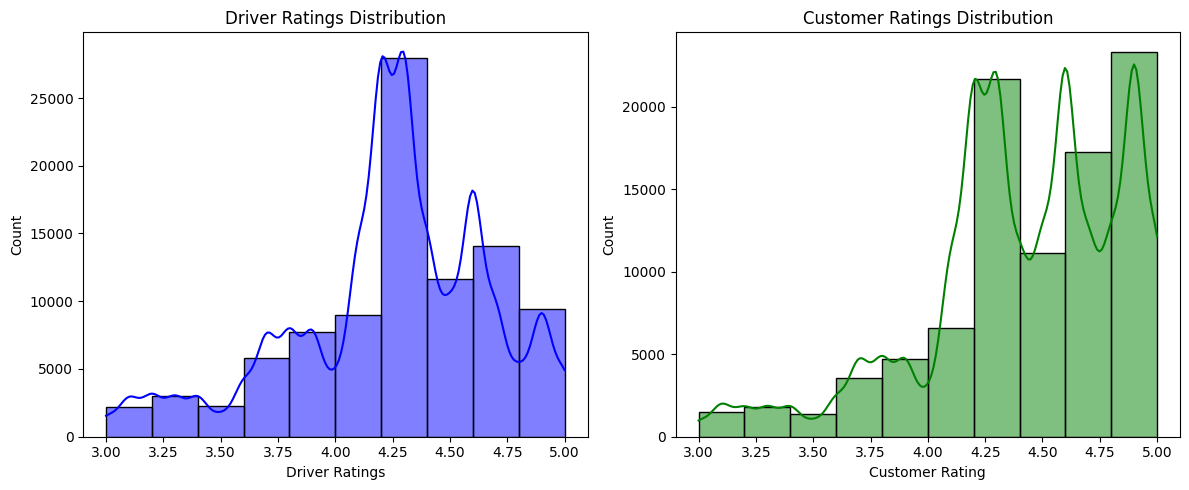

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df['Driver Ratings'], bins=10, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Driver Ratings Distribution")
sns.histplot(df['Customer Rating'], bins=10, kde=True, ax=axes[1], color='green')
axes[1].set_title("Customer Ratings Distribution")
plt.tight_layout()
plt.show()


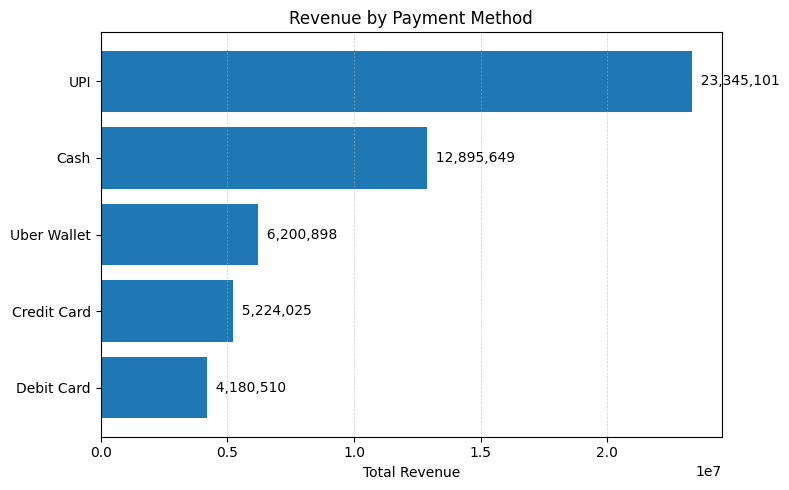

In [64]:
if {"Payment Method","Booking Value"}.issubset(df.columns):
    vals = pd.to_numeric(df["Booking Value"], errors="coerce")
    pm = (df.assign(_val=vals)
            .dropna(subset=["Payment Method"])
            .groupby("Payment Method")["_val"]
            .sum()
            .sort_values(ascending=True))
    if len(pm) > 0:
        plt.figure(figsize=(8,5))
        y = np.arange(len(pm))
        plt.barh(y, pm.values)
        plt.yticks(y, pm.index)
        for i, v in enumerate(pm.values):
            plt.text(v, i, f"  {int(v):,}", va="center")
        finalize("Revenue by Payment Method", "Total Revenue", None, grid_axis="x")


# **Machine Learning**

# This is a scikit-learn logistic regression model that predicts whether a ride will complete or not.I engineered features (hour, weekday, distance, ratings, payment method, vehicle/locations), impute missing values, scale numerics, and one-hot encode categories in a single pipeline. The model outputs a probability of completion for each ride; using a threshold, it labels rides as Completed vs Not.

Using: /kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv
Train shape: (120000, 12)  Test shape: (30000, 12)
Class ratio (1=Completed): 0.68
{'accuracy': 0.7847, 'precision': 1.0, 'recall': 0.6834, 'f1': 0.8119, 'roc_auc': 0.8245}


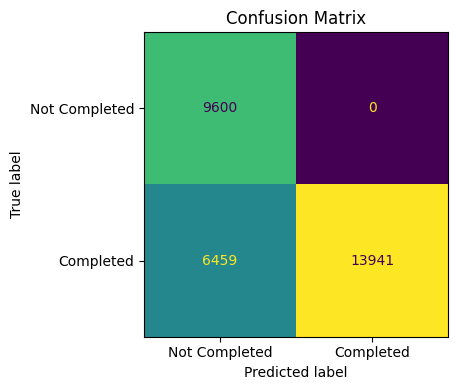

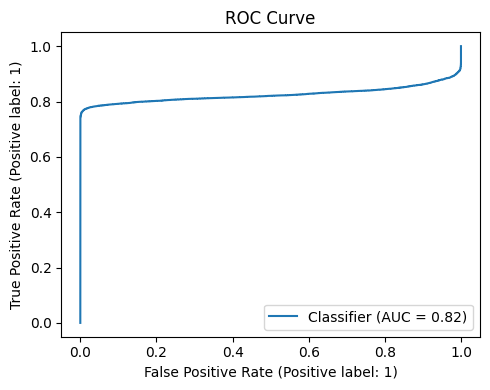

Top 15 features by absolute influence:


,feature,coef
99,Payment Method_UPI,-7.495793
96,Payment Method_Cash,2.321457
100,Payment Method_Uber Wallet,1.803962
97,Payment Method_Credit Card,1.699212
98,Payment Method_Debit Card,1.596366
5,Booking Value,0.665609
2,Customer Rating,-0.547103
1,Driver Ratings,-0.400327
31,Pickup Location_Kanhaiya Nagar,0.272799
36,Pickup Location_Mansarovar Park,-0.243253


In [65]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt

# Load Data
CANDIDATE_PATHS = [
    "/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv",
    "ncr_ride_bookings.csv"
]
for p in CANDIDATE_PATHS:
    if os.path.exists(p):
        DATA_PATH = p
        break
print("Using:", DATA_PATH)
df = pd.read_csv(DATA_PATH)

#Feature Engineering 
# Build event_time from Date + (Booking Time | Time)
time_col = "Booking Time" if "Booking Time" in df.columns else ("Time" if "Time" in df.columns else None)
if time_col and "Date" in df.columns:
    df["event_time"] = pd.to_datetime(df["Date"].astype(str) + " " + df[time_col].astype(str), errors="coerce")
else:
    df["event_time"] = pd.to_datetime(df.get("Date"), errors="coerce")

df["hour"] = df["event_time"].dt.hour
df["weekday"] = df["event_time"].dt.day_name()

# Target: 1 = Completed, 0 = otherwise
status_col = "Booking Status"
assert status_col in df.columns, f"'{status_col}' not found. Columns: {list(df.columns)}"
s = df[status_col].astype(str).str.lower()
df["y_completed"] = s.str.contains("complete").astype(int)
df = df.dropna(subset=["y_completed"]).copy()

# Cap extreme values to stabilize model
def num_clean(series, upper_quantile=99.5):
    s = pd.to_numeric(series, errors="coerce")
    if s.notna().sum() == 0:
        return s
    cap = np.nanpercentile(s.dropna(), upper_quantile)
    return s.clip(upper=cap)

# Reduce very high-cardinality categories (keep top-k, map rest -> "Other")
def topk_or_other(series, k=40):
    vc = series.value_counts(dropna=True)
    keep = set(vc.head(k).index)
    return series.where(series.isin(keep), "Other")

# Prepare features (use only if they exist)
num_candidates = ["Ride Distance", "Driver Ratings", "Customer Rating", "Avg VTAT", "Avg CTAT", "Booking Value", "hour"]
cat_candidates = ["Vehicle Type", "Pickup Location", "Drop Location", "Payment Method", "weekday"]

# Clean numerics
for c in num_candidates:
    if c in df.columns:
        df[c] = num_clean(df[c])

# Trim cardinality
for c in ["Pickup Location", "Drop Location"]:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip()
        df[c] = topk_or_other(df[c], k=40)

# ---------- Train / Test & Pipeline ----------
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    roc_auc_score, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay
)

numeric_features = [c for c in num_candidates if c in df.columns]
categorical_features = [c for c in cat_candidates if c in df.columns]

X = df[numeric_features + categorical_features].copy()
y = df["y_completed"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Class ratio (1=Completed):", round(y.mean(), 4))

# Preprocessing
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
pre = ColumnTransformer(
    [("num", num_pipe, numeric_features),
     ("cat", cat_pipe, categorical_features)],
    remainder="drop"
)

# Model
clf = LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=None)
pipe = Pipeline([("prep", pre), ("model", clf)])

# Train
pipe.fit(X_train, y_train)

# Metrics 
y_pred = pipe.predict(X_test)
y_prob = pipe.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary", zero_division=0)
auc = roc_auc_score(y_test, y_prob)

print({"accuracy": round(acc,4),
       "precision": round(prec,4),
       "recall": round(rec,4),
       "f1": round(f1,4),
       "roc_auc": round(auc,4)})

# Confusion Matrix (Matplotlib only)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,4))
ConfusionMatrixDisplay(cm, display_labels=["Not Completed","Completed"]).plot(ax=ax, colorbar=False)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# ROC Curve
fig, ax = plt.subplots(figsize=(5,4))
RocCurveDisplay.from_predictions(y_test, y_prob, ax=ax)
plt.title("ROC Curve")
plt.tight_layout()
plt.show()

# Feature Influence Snapshot
# Map coefficients back to feature names
import numpy as np
ohe = pipe.named_steps["prep"].named_transformers_["cat"].named_steps["onehot"] if categorical_features else None
cat_out = list(ohe.get_feature_names_out(categorical_features)) if ohe is not None else []
feat_names = np.array(numeric_features + cat_out)
coefs = pipe.named_steps["model"].coef_.ravel()
coef_df = pd.DataFrame({"feature": feat_names, "coef": coefs, "abs_coef": np.abs(coefs)}).sort_values("abs_coef", ascending=False)
print("Top 15 features by absolute influence:")
display(coef_df.head(15)[["feature","coef"]])


# The model is very conservative—it only predicts “Completed” when it’s very sure, so it rarely makes a false alarm, but it also misses a chunk of completed rides.